In [1]:
from CollabFilterOneVectorPerItem import *
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer, root_mean_squared_error, mean_absolute_error
from train_valid_test_loader import load_train_valid_test_datasets

In [ ]:
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
scoring = {'RMSE' : rmse_scorer, 'MAE' : mae_scorer}
steps = [0.8, 0.7, 0.6, 0.5, 0.1]
def find_best_step(n_users, n_items, train_tuple, valid_tuple, alpha=0.0):
        MAE_valid_per_step  = []
        RMSE_valid_per_step = []
        MAE_train_per_step  = []
        RMSE_train_per_step = []
        epochs_per_step = []
        scoring = {'RMSE' : rmse_scorer, 'MAE' : mae_scorer}
        for step in steps:
            model = CollabFilterOneVectorPerItem(
                n_epochs=400, batch_size=1000, step_size=step,
                n_factors=50, alpha=alpha)
            model.init_parameter_dict(n_users, n_items, train_tuple)
            model.fit(train_tuple, valid_tuple)
            MAE_valid_per_step.append(model.trace_mae_valid)
            RMSE_valid_per_step.append(model.trace_rmse_valid)
            epochs_per_step.append(model.trace_epoch)
        return MAE_valid_per_step, RMSE_valid_per_step, MAE_train_per_step, RMSE_train_per_step, epochs_per_step

In [3]:
def graph(x_vals_per_step, y_vals_per_step, y_title, main_title, experiment_var_list):
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'aqua', 'pink']
    print(len(x_vals_per_step))
    for i in range(len(x_vals_per_step)):
        print(i)
        plt.plot(x_vals_per_step[i], y_vals_per_step[i], '.-', color=colors[i], label=str(experiment_var_list[i]))
    plt.ylabel(y_title)
    plt.legend(bbox_to_anchor=(1.33, 0.5))
    plt.xlabel("Epoch")
    plt.ylim(top=1.2)
    plt.title(main_title)

In [2]:
train_tuple, valid_tuple, test_tuple, n_users, n_items = \
        load_train_valid_test_datasets()

[    0     1     2 ... 89989 89990 89991]


In [ ]:

MAE_per_step, RMSE_per_step, MAE_train_per_step, RMSE_train_per_step, epochs_per_step = find_best_step(n_users, n_items, train_tuple, valid_tuple)

KeyboardInterrupt: 

In [1]:
print(len(RMSE_per_step))
print(len(MAE_per_step))
print(len(epochs_per_step))
graph(epochs_per_step, RMSE_per_step, "RMSE", "RMSE across epochs for different step sizes on validation", steps)

NameError: name 'RMSE_per_step' is not defined

5
0
1
2
3
4


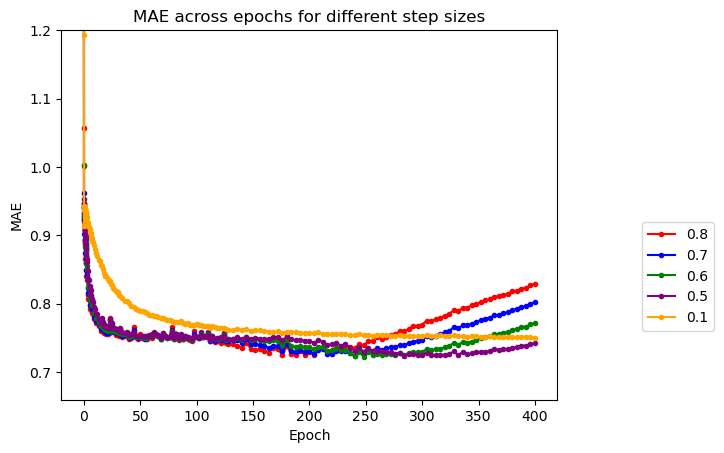

In [67]:
graph(epochs_per_step, MAE_per_step, "MAE", "MAE across epochs for different step sizes", steps)

In [ ]:
min_RMSE_index = []
min_RMSE = []
min_MAE_index = []
min_MAE = []
for i, RMSE in enumerate(RMSE_per_step):    
    print("step:", steps[i])
    print("min RMSE:", min(RMSE))
    print("min MAE:", min(MAE_per_step[i]))
    print("MAE lowest index:", MAE_per_step[i].index(min(MAE_per_step[i])))
    print("RMSE lowest index:", RMSE.index(min(RMSE)))
    print("epoch for RMSE:", epochs_per_step[i][RMSE.index(min(RMSE))])
    print("epoch for MAE:", epochs_per_step[i][MAE_per_step[i].index(min(MAE_per_step[i]))])
    min_RMSE_index.append(RMSE.index(min(RMSE)))
    min_RMSE.append(min(RMSE))
    min_MAE_index.append(MAE_per_step[i].index(min(MAE_per_step[i])))
    min_MAE.append(min(MAE_per_step[i]))
    print("-------")
print(min(min_RMSE))
print(min(min_MAE))
print("RMSE min index:", min_RMSE.index(min(min_RMSE)))
print("MAE min index:", min_MAE.index(min(min_MAE)))

step: 0.8
min RMSE: 0.9190946594411507
min MAE: 0.7246655232569181
MAE lowest index: 118
RMSE lowest index: 120
epoch for RMSE: 196.0
epoch for MAE: 188.0
-------
step: 0.7
min RMSE: 0.9194073522024324
min MAE: 0.7241643348290103
MAE lowest index: 131
RMSE lowest index: 126
epoch for RMSE: 220.0
epoch for MAE: 240.0
-------
step: 0.6
min RMSE: 0.9190878985373906
min MAE: 0.722770583364936
MAE lowest index: 133
RMSE lowest index: 135
epoch for RMSE: 256.0
epoch for MAE: 248.0
-------
step: 0.5
min RMSE: 0.9190420135065864
min MAE: 0.7239573524725061
MAE lowest index: 142
RMSE lowest index: 149
epoch for RMSE: 312.0
epoch for MAE: 284.0
-------
step: 0.1
min RMSE: 0.9495459048714832
min MAE: 0.750436436253742
MAE lowest index: 171
RMSE lowest index: 171
epoch for RMSE: 399.98571428571563
epoch for MAE: 399.98571428571563
-------
0.9190420135065864
0.722770583364936
RMSE index: 3
MAE index: 2


Based on the graph and this data, for alpha=0, we want step size = 0.5

In [3]:
def get_data_for_diff_K(n_users, n_items, train_tuple, valid_tuple):
    MAE_valid_per_K  = []
    RMSE_valid_per_K = []
    MAE_train_per_K  = []
    RMSE_train_per_K = []
    best_step = 0.8
    epochs_per_K = []
    for K in [2, 10, 50]:
        model = CollabFilterOneVectorPerItem(
                    n_epochs=400, batch_size=1000, step_size=best_step,
                    n_factors=K, alpha=0.0)
        model.init_parameter_dict(n_users, n_items, train_tuple)
        model.fit(train_tuple, valid_tuple)
        MAE_valid_per_K.append(model.trace_mae_valid)
        RMSE_valid_per_K.append(model.trace_rmse_valid)
        MAE_train_per_K.append(model.trace_mae_train)
        RMSE_train_per_K.append(model.trace_rmse_train)
        epochs_per_K.append(model.trace_epoch)
    return MAE_valid_per_K, RMSE_valid_per_K, MAE_train_per_K, RMSE_train_per_K, epochs_per_K

In [4]:
MAE_valid_per_K, RMSE_valid_per_K, MAE_train_per_K, RMSE_train_per_K, epochs_per_K = get_data_for_diff_K(n_users, n_items, train_tuple, valid_tuple)

epoch       0.000 | loss_total     5.55560 | tr RMSE     2.29522 | va RMSE     2.28138 | grad_wrt_mu     4.10885 | grad_wrt_b_per_user     0.00436 | grad_wrt_c_per_item     0.00244 | grad_wrt_U     0.00025 | grad_wrt_V     0.00014
epoch       0.014 | loss_total     2.95513 | tr RMSE     1.71817 | va RMSE     1.72786 | grad_wrt_mu     2.63551 | grad_wrt_b_per_user     0.00297 | grad_wrt_c_per_item     0.00166 | grad_wrt_U     0.00019 | grad_wrt_V     0.00011
epoch       0.029 | loss_total     1.79015 | tr RMSE     1.38906 | va RMSE     1.37891 | grad_wrt_mu     1.45681 | grad_wrt_b_per_user     0.00188 | grad_wrt_c_per_item     0.00105 | grad_wrt_U     0.00013 | grad_wrt_V     0.00008
epoch       0.043 | loss_total     1.40246 | tr RMSE     1.17631 | va RMSE     1.17898 | grad_wrt_mu     0.70003 | grad_wrt_b_per_user     0.00155 | grad_wrt_c_per_item     0.00096 | grad_wrt_U     0.00012 | grad_wrt_V     0.00007
epoch       0.129 | loss_total     1.23227 | tr RMSE     1.11454 | va RMSE  

In [43]:
import numpy as np
for i, RMSE in enumerate(RMSE_valid_per_K):
    min = np.min(np.asarray(RMSE))
    min_index = RMSE.index(min)
    epoch = epochs_per_K[i][min_index]
    print("min", min, "epoch", epoch)

for i, MAE in enumerate(MAE_valid_per_K):
    min = np.min(np.asarray(MAE))
    min_index = MAE.index(min)
    epoch = epochs_per_K[i][min_index]
    print("min", min, "epoch", epoch)

min 0.9409794618016833 epoch 216.0
min 0.9472819678126914 epoch 64.0
min 0.9530221983789087 epoch 52.0
min 0.7358450511069522 epoch 256.0
min 0.7447399378091039 epoch 72.0
min 0.7511952188109838 epoch 48.0


In [17]:
def graph_K(x_vals_per_K, valid_vals_per_K, train_vals_per_K, K_index, y_title, main_title):
    plt.plot(x_vals_per_K[K_index], valid_vals_per_K[K_index], '.-', color='red', label='Validation')
    plt.plot(x_vals_per_K[K_index], train_vals_per_K[K_index], '.-', color='blue', label='Training')
    plt.ylabel(y_title)
    plt.legend(bbox_to_anchor=(1.33, 0.5))
    plt.xlabel("Epoch")
    plt.ylim(top=1.2, bottom=0.2)
    plt.title(main_title)

In [2]:
K = [2, 10, 50]
print(RMSE_valid_per_K)
graph_K(epochs_per_K, RMSE_valid_per_K, RMSE_train_per_K, 2, "RMSE", "RMSE across epochs, K=50")

NameError: name 'RMSE_valid_per_K' is not defined

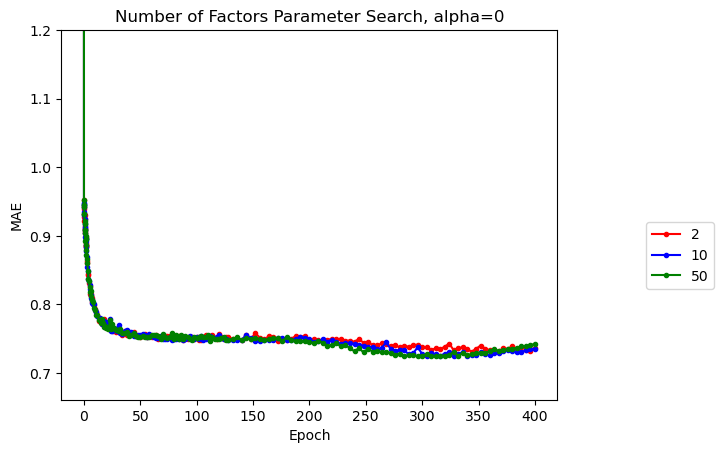

In [48]:
graph(epochs_per_K, MAE_valid_per_K, "MAE", "Number of Factors Parameter Search, alpha=0", K)

In [52]:
for i, RMSE in enumerate(RMSE_valid_per_K):
    print("K:", K[i])
    print("min RMSE:", min(RMSE))
    print("min MAE:", min(MAE_valid_per_K[i]))
    print("MAE lowest index:", MAE_valid_per_K[i].index(min(MAE_valid_per_K[i])))
    print("RMSE lowest index:", RMSE.index(min(RMSE)))
    print("epoch:", epochs_per_K[i][RMSE.index(min(RMSE))])
    print("-------")

K: 2
min RMSE: 0.9302761393761324
min MAE: 0.7307538987692744
MAE lowest index: 162
RMSE lowest index: 156
epoch: 340.0
-------
K: 10
min RMSE: 0.922046867291473
min MAE: 0.7244921531102323
MAE lowest index: 156
RMSE lowest index: 153
epoch: 328.0
-------
K: 50
min RMSE: 0.9190420135065864
min MAE: 0.7239573524725061
MAE lowest index: 142
RMSE lowest index: 149
epoch: 312.0
-------


In [77]:
MAE_per_step, RMSE_per_step, MAE_train_per_step, RMSE_train_per_step, epochs_per_step = find_best_step(n_users, n_items, train_tuple, valid_tuple, alpha=1)

epoch       0.000 | loss_total     5.54143 | tr RMSE     2.29508 | va RMSE     2.28127 | grad_wrt_mu     4.12717 | grad_wrt_b_per_user     0.00438 | grad_wrt_c_per_item     0.00245 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     2.90820 | tr RMSE     1.72957 | va RMSE     1.73904 | grad_wrt_mu     2.59383 | grad_wrt_b_per_user     0.00296 | grad_wrt_c_per_item     0.00167 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     1.83986 | tr RMSE     1.36156 | va RMSE     1.35155 | grad_wrt_mu     1.58140 | grad_wrt_b_per_user     0.00196 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     1.60289 | tr RMSE     1.22864 | va RMSE     1.23270 | grad_wrt_mu     1.12060 | grad_wrt_b_per_user     0.00174 | grad_wrt_c_per_item     0.00105 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     1.13034 | tr RMSE     1.11576 | va RMSE  

KeyboardInterrupt: 

In [45]:
import pandas as pd
DATA_PATH = 'data_movie_lens_100k/'
select_movies_df = pd.read_csv(DATA_PATH + 'select_movies.csv')
print(select_movies_df)

    item_id                                      title  release_year  \
0         0                           Toy Story (1995)          1995   
1        70                      Lion King, The (1994)          1994   
2        98     Snow White and the Seven Dwarfs (1937)          1937   
3       131                   Wizard of Oz, The (1939)          1939   
4       142                 Sound of Music, The (1965)          1965   
5        49                           Star Wars (1977)          1977   
6       171            Empire Strikes Back, The (1980)          1980   
7       180                  Return of the Jedi (1983)          1997   
8        81                       Jurassic Park (1993)          1993   
9       251      Lost World: Jurassic Park, The (1997)          1997   
10      173             Raiders of the Lost Ark (1981)          1981   
11      209  Indiana Jones and the Last Crusade (1989)          1989   
12       65             While You Were Sleeping (1995)          

In [50]:
best_k2_model = CollabFilterOneVectorPerItem(
                    n_epochs=217, batch_size=1000, step_size=0.5,
                    n_factors=2, alpha=0.001)
best_k2_model.init_parameter_dict(n_users, n_items, train_tuple)
best_k2_model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     5.55565 | tr RMSE     2.29522 | va RMSE     2.28138 | grad_wrt_mu     4.10885 | grad_wrt_b_per_user     0.00436 | grad_wrt_c_per_item     0.00244 | grad_wrt_U     0.00025 | grad_wrt_V     0.00014
epoch       0.014 | loss_total     1.22697 | tr RMSE     1.12680 | va RMSE     1.12557 | grad_wrt_mu     0.16124 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00012 | grad_wrt_V     0.00006
epoch       0.029 | loss_total     1.26666 | tr RMSE     1.12448 | va RMSE     1.12229 | grad_wrt_mu     0.13942 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00012 | grad_wrt_V     0.00007
epoch       0.043 | loss_total     1.29077 | tr RMSE     1.12706 | va RMSE     1.12408 | grad_wrt_mu     0.18324 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00012 | grad_wrt_V     0.00007
epoch       0.129 | loss_total     1.23893 | tr RMSE     1.11860 | va RMSE  

In [ ]:
best_k2_model.predict()

In [53]:
df = pd.read_csv('/Users/davidshapiro/Desktop - Duck Duck Goose pro/Grad School/Year 1/Semester 1/Classes/Machine Learning/Projects/projectB/data_movie_lens_100k/ratings_all_development_set.csv')
item_ids = df['item_id']
print(item_ids)

0         36
1        228
2        401
3         98
4        504
        ... 
89987    813
89988    120
89989    505
89990    472
89991    204
Name: item_id, Length: 89992, dtype: int64


In [69]:
B = 0.002

_, _ = plt.subplots(figsize=(8., 8.));

for sid, itemid in enumerate(select_movies_df['item_id'].values):
    title = select_movies_df['title'].values[sid]
    row_id = np.flatnonzero(item_ids == itemid)[0]
    movie_vec_2 = best_k2_model.param_dict['V'].T
    plt.plot(movie_vec_2[0], movie_vec_2[1], 'k.', markersize=8)
    
    if title.count("Wedding"):
        curBy = -3 * B # manual edit to make more readable
    else:
        curBy = B
    
    plt.text(movie_vec_2[0] + B, movie_vec_2[1] + curBy,
             title, rotation=15, fontsize=11)
    
plt.xlabel('LF dim. 1');
plt.ylabel('LF dim. 2');    
plt.axis('equal');

Error in callback <function _draw_all_if_interactive at 0x1481354e0> (for post_execute), with arguments args (),kwargs {}:


TypeError: only length-1 arrays can be converted to Python scalars

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 800x800 with 1 Axes>